# Supervised Algorithms Homework

In this homework assignment, you will apply three fundamental machine learning algorithms to famous datasets:

1. **Linear Regression**: Boston Housing Price Prediction
2. **Logistic Regression**: Breast Cancer Classification
3. **Decision Tree**: Titanic Survival Prediction

### Instructions

- Implement **at least** one algorithm
- Complete each section carefully
- Add your code where indicated by `# YOUR CODE HERE`
- Provide comments explaining your approach

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Specific Algorithms
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Metrics and Datasets
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, mean_absolute_error

# Set random seed for reproducibility
np.random.seed(42)

# 1: Linear Regression - Boston Housing Price Prediction

### Task
- Load the Boston Housing dataset
- Preprocess the data
- Split into training and testing sets
- Train a Linear Regression model
- Evaluate model performance

In [2]:
# Load Boston Housing dataset
boston = fetch_openml(name="boston", version=1, as_frame=True)

# Extract features and target
X, y = boston.data, boston.target

In [3]:
# TODO: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# TODO: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# TODO: Train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [6]:
# TODO: Make predictions and calculate performance metrics
y_pred = lr_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [7]:
# TODO: Print performance metrics
print(f'Mean Squared Error: {mse:.4f}')
print(f'Root Mean Squared Error: {rmse:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')
print(f'R² Score: {r2:.4f}')

Mean Squared Error: 24.2911
Root Mean Squared Error: 4.9286
Mean Absolute Error: 3.1891
R² Score: 0.6688


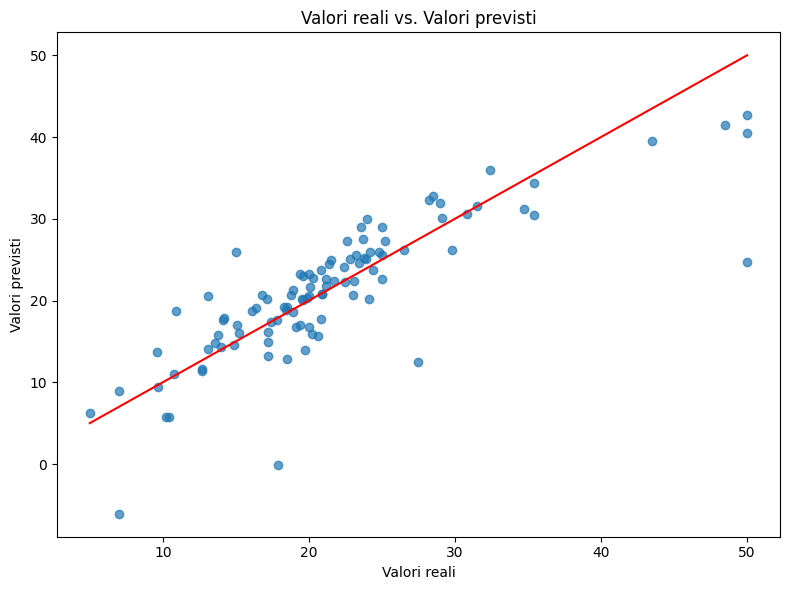

In [8]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel('Valori reali')
plt.ylabel('Valori previsti')
plt.title('Valori reali vs. Valori previsti')
plt.tight_layout()
plt.show()

## Part 2: Logistic Regression - Breast Cancer Classification

### Task
- Load the Breast Cancer dataset
- Preprocess the data
- Split into training and testing sets
- Train a Logistic Regression model
- Evaluate model performance

In [9]:
breast_cancer = load_breast_cancer()
X_cancer = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
y_cancer = breast_cancer.target

In [10]:
X_cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [11]:
y_cancer

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [12]:
# TODO: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, test_size=0.2, random_state=42)

In [13]:
# controllo i set
len(X_train), len(y_train), len(X_test), len(y_test)

(455, 455, 114, 114)

In [14]:
# TODO: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# TODO: Train a Logistic Regression model
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [16]:
# TODO: Make predictions and calculate performance metrics
y_pred = log_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test,  y_pred)

In [17]:
# TODO: Print performance metrics
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Accuracy: 0.97 - Il modello classifica correttamente il 97% di tutti i casi (eccellente) Per classe (0 - non cancro, 1 - cancro):

- **precision**
  - classe 0: 0.98 - il 98% delle predizioni della classe 0 sono corrette
  - classe 1: 0.97 - il 97% delle predizioni della classe 1 sono corrette
- **recall**
  - Classe 0: 0.95 - Il modello identifica correttamente il 95% dei veri casi di classe 0
  - Classe 1: 0.99 - Il modello identifica correttamente il 99% dei veri casi di classe 1
- **f1-score**
  - Classe 0: 0.96 - Media armonica di precision e recall per classe 0
  - Classe 1: 0.98 - Media armonica di precision e recall per classe 1

Queste metriche indicano che il modello di regressione logistica è molto performante.

## Part 3: Decision Tree - Titanic Survival Prediction

### Task
- Load the Titanic dataset
- Preprocess the data (handling missing values, encoding categorical variables)
- Split into training and testing sets
- Train a Decision Tree Classifier
- Evaluate model performance

In [18]:
# Load Titanic dataset
titanic = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')

In [19]:
print(titanic.head())
print(titanic.columns)

   Survived  Pclass                                               Name  \
0         0       3                             Mr. Owen Harris Braund   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2         1       3                              Miss. Laina Heikkinen   
3         1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4         0       3                            Mr. William Henry Allen   

      Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0    male  22.0                        1                        0   7.2500  
1  female  38.0                        1                        0  71.2833  
2  female  26.0                        0                        0   7.9250  
3  female  35.0                        1                        0  53.1000  
4    male  35.0                        0                        0   8.0500  
Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents

In [20]:
# Data Preprocessing
# TODO: Handle missing values
#controllo se ci sono valori nulli
nan_counts = titanic.isnull().sum()
print(nan_counts)

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64


In [21]:
# Feature selection

features = ['Pclass', 'Sex', 'Age', 'Fare']
X_titanic = titanic[features]
y_titanic = titanic['Survived']

# Definisco le colonne numeriche da scalare
numeric_features = ['Age', 'Fare']
# Definisco le colonne categoriche
categorical_features = ['Pclass', 'Sex']

In [22]:
# Crea il trasformatore per applicare il ridimensionamento alle caratteristiche numeriche e codifica alle categorie
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  # Applica StandardScaler alle colonne numeriche
        ('cat', OneHotEncoder(), categorical_features)  # Applica OneHotEncoder alle colonne categoriche
    ])

# Creazione del modello di pipeline 
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(max_depth=4, random_state=42))  
])

In [23]:
# TODO: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_titanic, y_titanic, test_size=0.2, random_state=42)

In [24]:
# TODO: Train a Decision Tree Classifier
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Fare']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Pclass', 'Sex'])])),
                ('classifier',
                 DecisionTreeClassifier(max_depth=4, random_state=42))])

In [25]:
# TODO: Make predictions and calculate performance metrics
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8033707865168539

In [26]:
# TODO: Print performance metrics
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8033707865168539


In [27]:
# TODO: Visualize Decisoion Tree
classifier = model.named_steps['classifier']  # Estraggo il classificatore dalla pipeline

# Estraggo i nomi delle caratteristiche dopo OneHotEncoder
# 1. Applico il trasformatore sulle colonne categoriche per ottenere il risultato di codifica one-hot
cat_transformer = preprocessor.transformers_[1][1]  # Estraggo l'encoder OneHot
cat_columns = cat_transformer.get_feature_names_out(categorical_features)  # Ottiengo i nomi delle colonne dopo OneHot

print(cat_columns)

# Combino i nomi delle caratteristiche numeriche e categoriche
all_feature_names = numeric_features + list(cat_columns)


['Pclass_1' 'Pclass_2' 'Pclass_3' 'Sex_female' 'Sex_male']


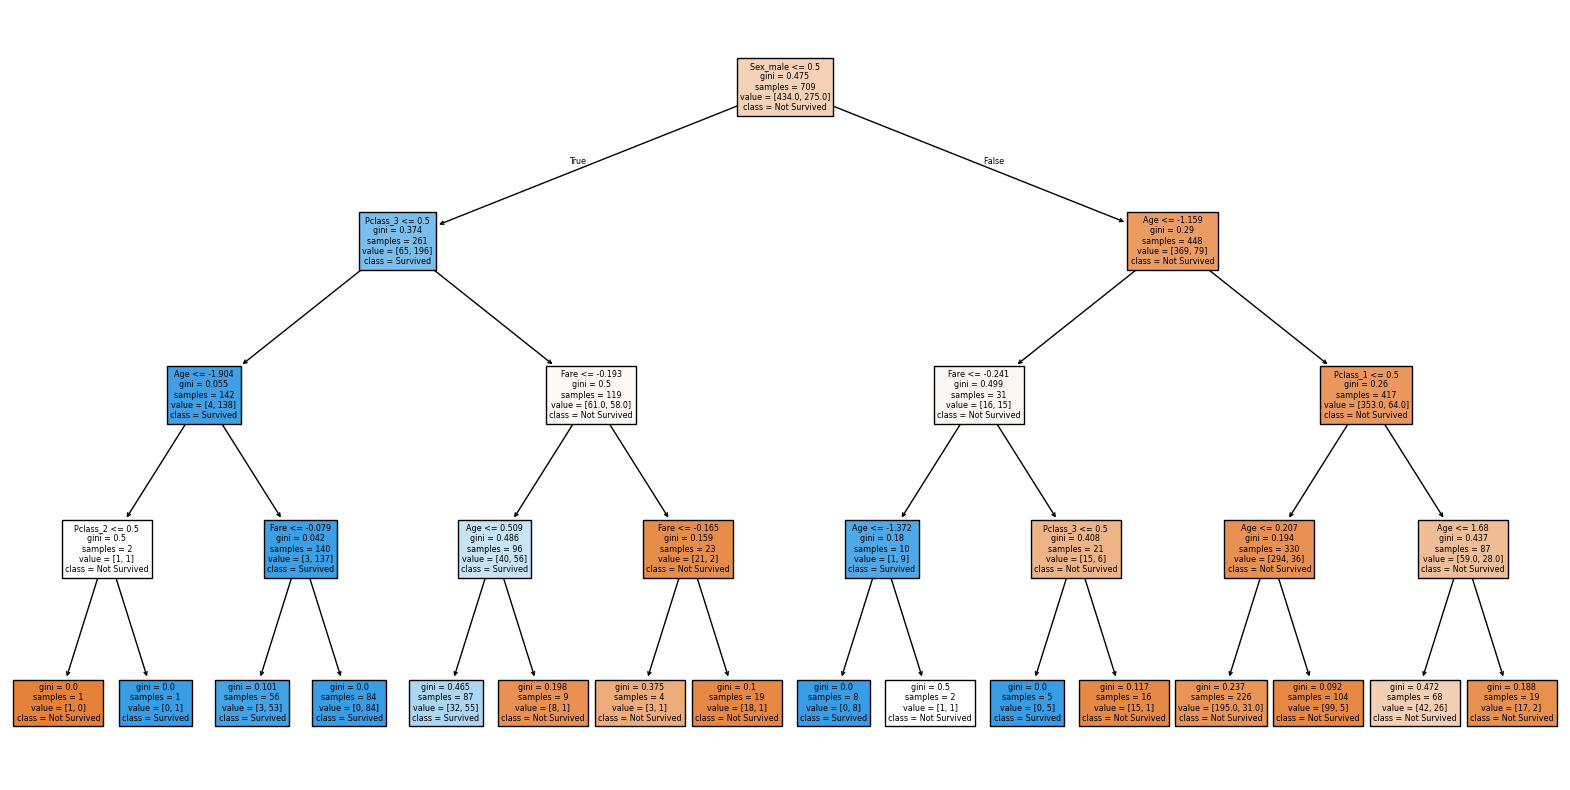

In [28]:
# Visualizzo l'albero decisionale
plt.figure(figsize=(20, 10))  # Imposta la dimensione della figura
plot_tree(classifier, feature_names=all_feature_names, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

Avendo fatto diverse prove ho deciso di dare una profondità 4 per ottenere il livello di accuracy migliore. L'albero decisionale è utile per capire quali sono le caratteristiche più rilevanti per prevedere la sopravvivenza. Nella radice si ha una divisione attraverso la variabile età, che è una  variabile molto rilevante per prevedere la sopravvivenza. Per gli uomini ottengo un ultriore divisione per pclass e ancora per Age e Fare, mentre per le donne ottengo prima una divisione per Age e in seguito per Fare e P-class. 

Ogni nodo successivo rappresenta una nuova divisione basata su un'altra caratteristica. Ogni divisione viene fatta per massimizzare la "purezza" dei dati nei nodi successivi (cioè, per separare meglio i sopravvissuti dai non sopravvissuti).
